## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365
app_train['YEARS_BIRTH'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: YEARS_BIRTH, dtype: float64

In [4]:
# 等寬劃分
app_train['EQUAL_YEAR'] = pd.cut(app_train['YEARS_BIRTH'], 10)
app_train['EQUAL_YEAR'].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: EQUAL_YEAR, dtype: int64

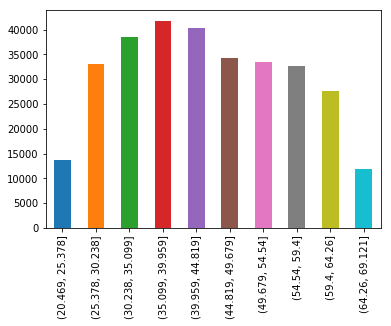

In [5]:
app_train['EQUAL_YEAR'].value_counts().sort_index().plot(kind='bar');

In [6]:
# 等頻劃分
# pandas.qcut() 是依照分位數來決定分割區間後，所以有可能各組數據量會有不同
app_train['EQUAL_FREQ_YEAR'] = pd.qcut(app_train['YEARS_BIRTH'], 10)
app_train['EQUAL_FREQ_YEAR'].value_counts()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: EQUAL_FREQ_YEAR, dtype: int64

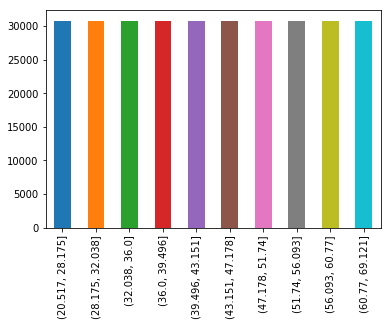

In [7]:
app_train['EQUAL_FREQ_YEAR'].value_counts().sort_index().plot(kind='bar');

In [8]:
# 自定義的 bin
print(app_train['YEARS_BIRTH'].describe())
cut_rule = [20, 30, 40, 50, 60, 70]
app_train['CUST_YEARS_BIRTH'] = pd.cut(app_train['YEARS_BIRTH'], cut_rule)
app_train['CUST_YEARS_BIRTH'].value_counts()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEARS_BIRTH, dtype: float64


(30, 40]    82308
(40, 50]    76541
(50, 60]    68062
(20, 30]    45021
(60, 70]    35579
Name: CUST_YEARS_BIRTH, dtype: int64

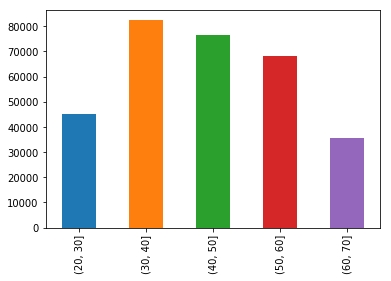

In [9]:
app_train['CUST_YEARS_BIRTH'].value_counts().sort_index().plot(kind='bar');